# Import Libraries and load data


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.metrics import classification_report

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
## Preprocess
# Convert labels to numerical values
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# Preprocess

Visualization of the number of samples in each class for the train and test sets.

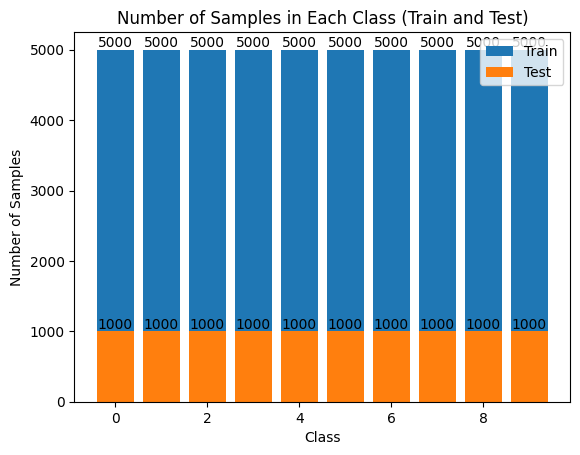

In [ ]:
import matplotlib.pyplot as plt

# Preprocess
# Convert labels to numerical values
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Get the unique classes and their counts for train and test sets
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)
unique_classes_test, class_counts_test = np.unique(y_test, return_counts=True)

# Plot the number of samples in each class for train and test sets
fig, ax = plt.subplots()
ax.bar(unique_classes_train, class_counts_train, label='Train')
ax.bar(unique_classes_test, class_counts_test, label='Test')

# Add the number of samples as text on top of each bar
for i, count in enumerate(class_counts_train):
    ax.text(i, count, str(count), ha='center', va='bottom')

for i, count in enumerate(class_counts_test):
    ax.text(i, count, str(count), ha='center', va='bottom')

ax.set_xlabel("Class")
ax.set_ylabel("Number of Samples")
ax.set_title("Number of Samples in Each Class (Train and Test)")
ax.legend()
plt.show()


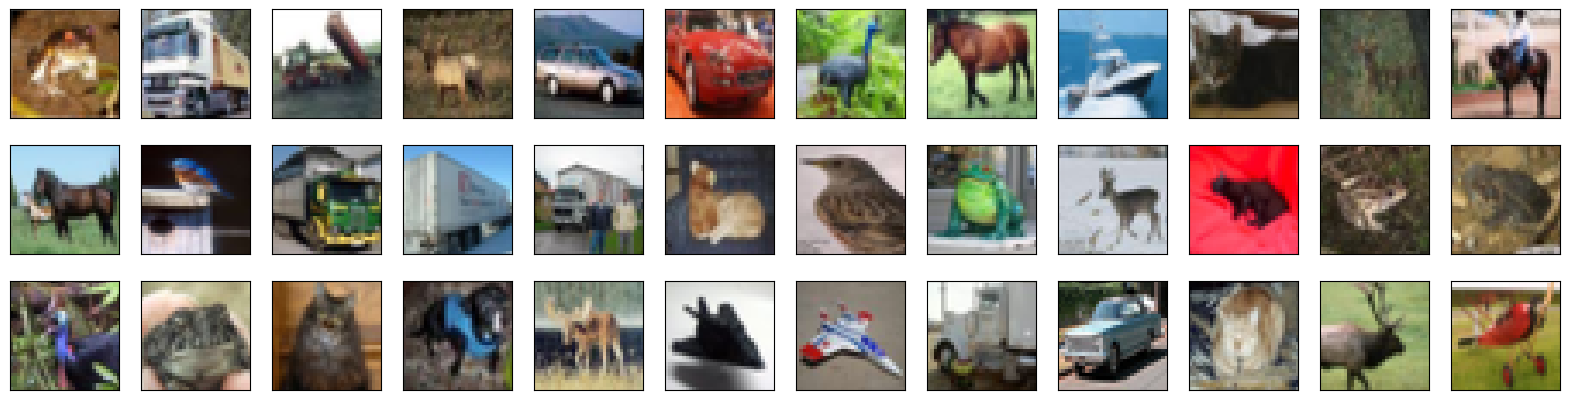

In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [ ]:
from sklearn import preprocessing

# Normalize the pixel values in the CIFAR-10 dataset
X_train_normalized = preprocessing.normalize(X_train.reshape(X_train.shape[0], -1))
X_test_normalized = preprocessing.normalize(X_test.reshape(X_test.shape[0], -1))

# Reshape the normalized data back to the original shape
X_train = X_train_normalized.reshape(X_train.shape)
X_test = X_test_normalized.reshape(X_test.shape)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate the image randomly by up to 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by up to 20% of the total width
    height_shift_range=0.2,  # Shift the image vertically by up to 20% of the total height
    horizontal_flip=False,  # Flip the image horizontally
    vertical_flip=False  # Do not flip the image vertically
)

# Fit the ImageDataGenerator on your training data
datagen.fit(X_train)

# Generate augmented images
augmented_images = datagen.flow(X_train, y_train, batch_size=5)


In [ ]:
augmented_images_array = np.array([augmented_images[i][0][0] for i in range(len(augmented_images))])

# Add augmented images to X_train
X_train_augmented = np.concatenate((X_train, augmented_images_array), axis=0)

# Update y_train to include labels for augmented images
y_train_augmented = np.concatenate((y_train, y_train[:len(augmented_images_array)]), axis=0)
X_train_augmented = X_train_augmented.astype(int)
print(X_train_augmented.shape, y_train_augmented.shape)

(60000, 32, 32, 3) (60000, 1)


In [ ]:
X_train=X_train_augmented
y_train=y_train_augmented

# PCA
The given plot illustrates the relationship between the principal component number and the proportion of variance explained. It serves as a useful tool to determine the appropriate number of principal components to retain for dimensionality reduction. By examining the scree plot, we can identify a point where there is a noticeable change in the proportion of variance explained, resembling the shape of an elbow. This point indicates a heuristic or rule of thumb for selecting the number of principal components to retain in order to effectively reduce the dimensionality of the data.

In [ ]:
# Reshape the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



(50000, 3072)


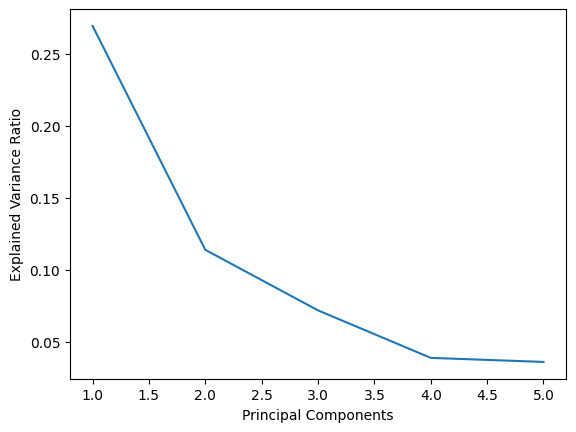

In [ ]:
x = [1,2,3,4,5]
y = pca.explained_variance_ratio_[:5]
plt.plot(x,y)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
E= pca.components_[:10]
E.shape

(10, 3072)

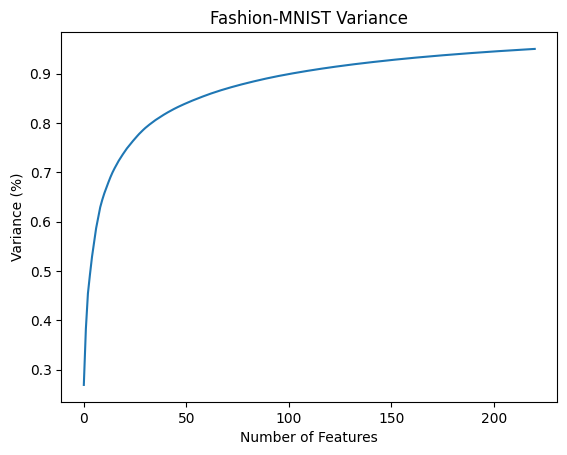

In [ ]:
# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

# Grid Search

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid for hyperparameter tuning
param_grid = {
'max_depth': [3, 8, 10],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 3]
}
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit (X_train, y_train)
# Print the best hyperparameters and corresponding mean cross-validated score
print ("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

KeyboardInterrupt: ignored

# Decision tree classification system applied on extracted features using PCA


In [ ]:
max_depth = 8


# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=max_depth)

# Train the classifier on the training data
clf.fit(X_train, y_train)





DecisionTreeClassifier(max_depth=8)

In [ ]:
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
is_leaves = np.zeros(shape=clf.tree_.node_count, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
#     node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [ ]:
num_leaves = 0
for i in range(len(is_leaves)):
    if(is_leaves[i] == True):
        num_leaves +=1
print('Number of leaf nodes',num_leaves)

Number of leaf nodes 255


In [ ]:
# Make predictions on the test data
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:", accuracy_test)
print("Accuracy:", accuracy_train)

Accuracy: 0.3079
Accuracy: 0.33546


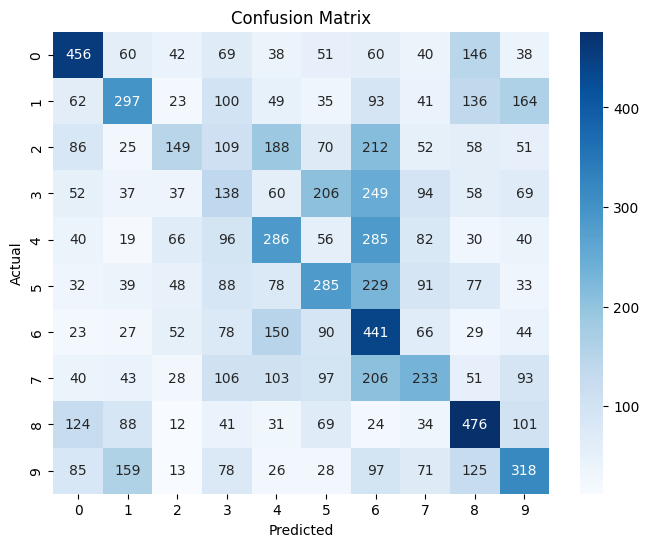

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print(clf.tree_.node_count)
print(clf.tree_.max_depth)

509
8


In [ ]:
y_train_augmented=y_train

# Semi_supervised algorithm

In [ ]:
y_train_augmented=y_train

In [ ]:
# Split the training set into labeled and unlabeled data
X_labeled1, X_unlabeled1, y_labeled1, y_unlabeled1 = train_test_split(X_train, y_train_augmented, test_size=0.8, random_state=42)
print(X_labeled1.shape, X_unlabeled1.shape)
y_labeled1=y_labeled1.ravel()


(10000, 221) (40000, 221)


In [ ]:
#Add 5 percent of unlabeled data each time

from sklearn.metrics import classification_report
#print(X_train.shape,X_test.shape)

train_sizes2 = []  # List to store train sizes
test_accuracies2 = []  # List to store test accuracies
test_fscore2=[]

# Split the training set into labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled= X_labeled1, X_unlabeled1, y_labeled1, y_unlabeled1

max_depth = 8

# Create a decision tree classifier
initial_model = DecisionTreeClassifier(max_depth=max_depth)

# Train an initial decision tree with labeled data
#initial_model = DecisionTreeClassifier()
initial_model.fit(X_labeled, y_labeled)

# Specify the number of iterations
num_iterations =50

for iteration in range(num_iterations):
    print("Iteration "+ str(iteration+1))

    if(len(X_unlabeled)>0):
      # Predict labels and probabilities for the unlabeled data
      y_pred_unlabeled = initial_model.predict(X_unlabeled)
      y_pred_probs = initial_model.predict_proba(X_unlabeled)
    else:
      break

    # Sort the probabilities in descending order and get the corresponding indices
    sorted_indices = np.argsort(y_pred_probs.max(axis=1))[::-1]

    # Calculate the number of elements to select
    percent = 0.05  # 10%
    num_elements = int(X_unlabeled.shape[0] * percent)

    # Select the top 10 percent samples with the highest probability for the current class
    high_confidence_indices = sorted_indices[sorted_indices[:num_elements]]

    # Add the selected samples to the labeled data
    X_labeled = np.concatenate((X_labeled, X_unlabeled[high_confidence_indices]), axis=0)
    y_labeled = np.concatenate((y_labeled, y_pred_unlabeled[high_confidence_indices]), axis=0)

    # Remove high-confidence samples from the unlabeled data
    X_unlabeled = np.delete(X_unlabeled, high_confidence_indices, axis=0)

    print(X_labeled.shape, X_unlabeled.shape)

    # Retrain the decision tree with the updated labeled data
    initial_model.fit(X_labeled, y_labeled)

    # Make predictions on the test data
    y_pred_train = initial_model.predict(X_train)
    y_pred = initial_model.predict(X_test)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_pred_train, y_train_augmented)
    print("Test Accuracy:", accuracy_test)
    print("Train Accuracy:", accuracy_train)
    # Compute classification metrics
    report = classification_report(y_test, y_pred,digits=4)
    # Extract the F-score, precision, and recall values
    metrics = report.split('\n')[-2].split()[2:]

    # Print the F-score, precision, and recall values
    print("F-score:", metrics[0])
    print("Precision:", metrics[1])
    print("Recall:", metrics[2])

    # Save train size and test accuracy
    train_sizes2.append(X_labeled.shape[0])
    test_accuracies2.append(accuracy_test)
    test_fscore2.append(float(metrics[0]))

Iteration 1
(12000, 221) (38000, 221)
Test Accuracy: 0.2758
Train Accuracy: 0.2916
F-score: 0.2917
Precision: 0.2758
Recall: 0.2787
Iteration 2
(13900, 221) (36100, 221)
Test Accuracy: 0.2751
Train Accuracy: 0.28926
F-score: 0.2906
Precision: 0.2751
Recall: 0.2788
Iteration 3
(15705, 221) (34295, 221)
Test Accuracy: 0.2778
Train Accuracy: 0.29196
F-score: 0.2931
Precision: 0.2778
Recall: 0.2815
Iteration 4
(17419, 221) (32581, 221)
Test Accuracy: 0.2791
Train Accuracy: 0.29148
F-score: 0.2945
Precision: 0.2791
Recall: 0.2825
Iteration 5
(19048, 221) (30952, 221)
Test Accuracy: 0.2794
Train Accuracy: 0.29118
F-score: 0.2942
Precision: 0.2794
Recall: 0.2829
Iteration 6
(20595, 221) (29405, 221)
Test Accuracy: 0.2799
Train Accuracy: 0.29138
F-score: 0.2944
Precision: 0.2799
Recall: 0.2834
Iteration 7
(22065, 221) (27935, 221)
Test Accuracy: 0.2799
Train Accuracy: 0.29086
F-score: 0.2943
Precision: 0.2799
Recall: 0.2833
Iteration 8
(23461, 221) (26539, 221)
Test Accuracy: 0.2809
Train Accu

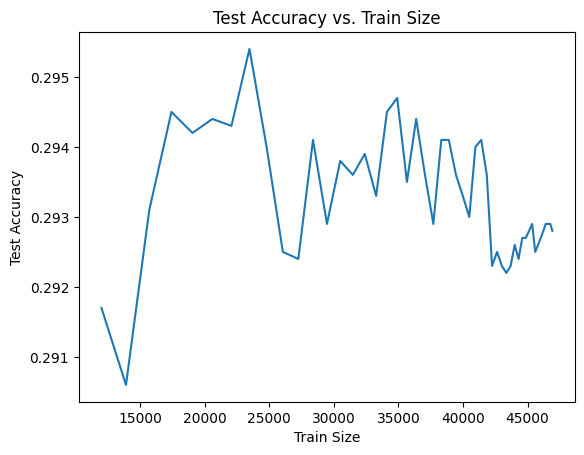

In [ ]:
# Plotting the chart
plt.plot(train_sizes2, test_fscore2)#test_accuracies2
plt.xlabel("Train Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Train Size")
plt.show()

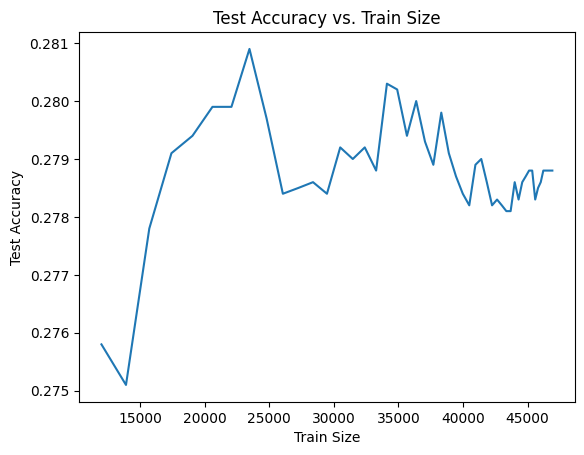

In [ ]:
# Plotting the chart
plt.plot(train_sizes2, test_accuracies2)#test_accuracies2
plt.xlabel("Train Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Train Size")
plt.show()

In [ ]:
#Add 1000 unlabeled data each time

train_sizes3 = []  # List to store train sizes
test_accuracies3 = []  # List to store test accuracies
test_fscore3=[]

#print(X_train.shape,X_test.shape)
# Split the training set into labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled= X_labeled1, X_unlabeled1, y_labeled1, y_unlabeled1

# Create a decision tree classifier
initial_model = DecisionTreeClassifier(max_depth=8)

# Train an initial decision tree with labeled data
#initial_model = DecisionTreeClassifier()
initial_model.fit(X_labeled, y_labeled)

# Specify the number of iterations
num_iterations =100

for iteration in range(num_iterations):
    print("Iteration "+ str(iteration+1))

    if(len(X_unlabeled)>0):
      # Predict labels and probabilities for the unlabeled data
      y_pred_unlabeled = initial_model.predict(X_unlabeled)
      y_pred_probs = initial_model.predict_proba(X_unlabeled)
    else:
      break

    # Sort the probabilities in descending order and get the corresponding indices
    sorted_indices = np.argsort(y_pred_probs.max(axis=1))#[::-1]

    # Calculate the number of elements to select
    percent = 0.1  # 10%
    num_elements = int(X_train.shape[0] * percent)

    # Select the top 10 percent samples with the highest probability for the current class
    high_confidence_indices = sorted_indices[sorted_indices[:1000]]

    # Add the selected samples to the labeled data
    X_labeled = np.concatenate((X_labeled, X_unlabeled[high_confidence_indices]), axis=0)
    y_labeled = np.concatenate((y_labeled, y_pred_unlabeled[high_confidence_indices]), axis=0)

    # Remove high-confidence samples from the unlabeled data
    X_unlabeled = np.delete(X_unlabeled, high_confidence_indices, axis=0)

    print(X_labeled.shape, X_unlabeled.shape)

    # Retrain the decision tree with the updated labeled data
    initial_model.fit(X_labeled, y_labeled)

    # Make predictions on the test data
    y_pred_train = initial_model.predict(X_train)
    y_pred = initial_model.predict(X_test)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_pred_train, y_train_augmented)
    print("Test Accuracy:", accuracy_test)
    print("Train Accuracy:", accuracy_train)

    # Compute classification metrics
    report = classification_report(y_test, y_pred,digits=4)
    # Extract the F-score, precision, and recall values
    metrics = report.split('\n')[-2].split()[2:]

    # Print the F-score, precision, and recall values
    print("F-score:", metrics[0])
    print("Precision:", metrics[1])
    print("Recall:", metrics[2])

    # Save train size and test accuracy
    train_sizes3.append(X_labeled.shape[0])
    test_accuracies3.append(accuracy_test)
    test_fscore3.append(float(metrics[0]))

Iteration 1
(11000, 221) (39000, 221)
Test Accuracy: 0.279
Train Accuracy: 0.29672
F-score: 0.2824
Precision: 0.2790
Recall: 0.2772
Iteration 2
(12000, 221) (38000, 221)
Test Accuracy: 0.2875
Train Accuracy: 0.30252
F-score: 0.2895
Precision: 0.2875
Recall: 0.2853
Iteration 3
(13000, 221) (37000, 221)
Test Accuracy: 0.2877
Train Accuracy: 0.30188
F-score: 0.2900
Precision: 0.2877
Recall: 0.2862
Iteration 4
(14000, 221) (36000, 221)
Test Accuracy: 0.2834
Train Accuracy: 0.29894
F-score: 0.2860
Precision: 0.2834
Recall: 0.2819
Iteration 5
(15000, 221) (35000, 221)
Test Accuracy: 0.2852
Train Accuracy: 0.29764
F-score: 0.2866
Precision: 0.2852
Recall: 0.2834
Iteration 6
(16000, 221) (34000, 221)
Test Accuracy: 0.2856
Train Accuracy: 0.29844
F-score: 0.2877
Precision: 0.2856
Recall: 0.2839
Iteration 7
(17000, 221) (33000, 221)
Test Accuracy: 0.2852
Train Accuracy: 0.2991
F-score: 0.2877
Precision: 0.2852
Recall: 0.2836
Iteration 8
(18000, 221) (32000, 221)
Test Accuracy: 0.2851
Train Accur

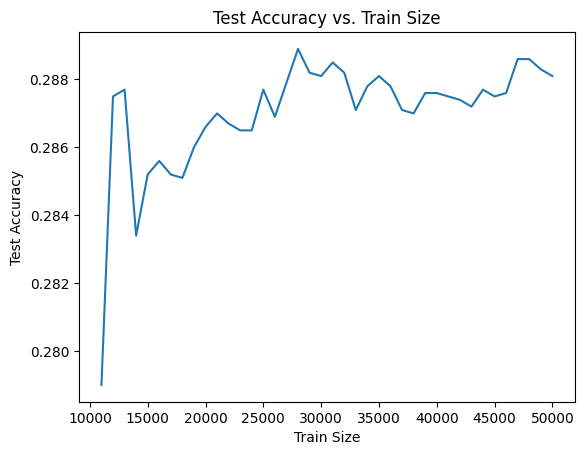

In [ ]:
# Plotting the chart
plt.plot(train_sizes3, test_accuracies3)
plt.xlabel("Train Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Train Size")
plt.show()

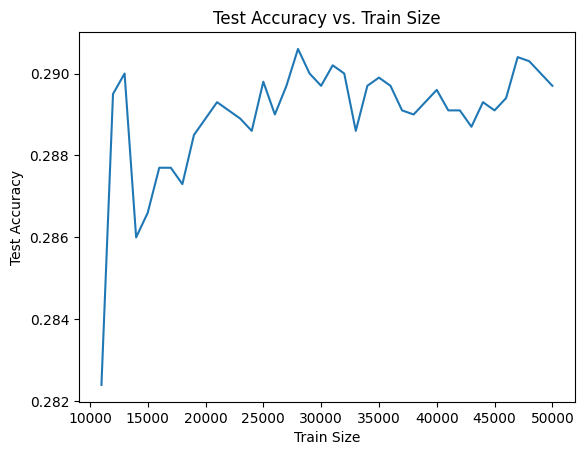

In [ ]:
# Plotting the chart
plt.plot(train_sizes3, test_fscore3)
plt.xlabel("Train Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Train Size")
plt.show()

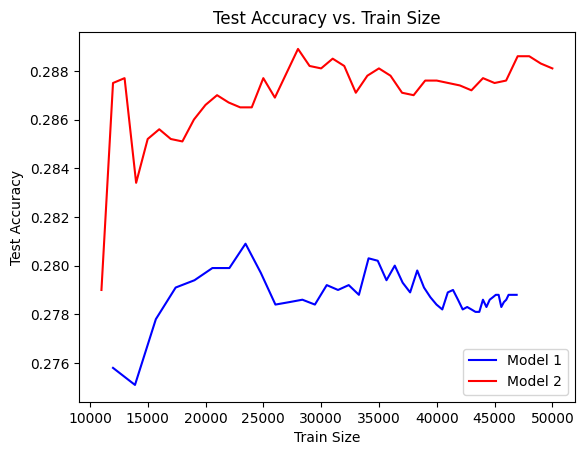

In [ ]:
# Plotting the chart
#plt.plot(train_sizes1, test_accuracies1, label="Model 1")
plt.plot(train_sizes2, test_accuracies2,color='blue', label="Model 1")
plt.plot(train_sizes3, test_accuracies3,color='red', label="Model 2")

plt.xlabel("Train Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Train Size")
plt.legend()  # Add legend to differentiate the lines
plt.show()

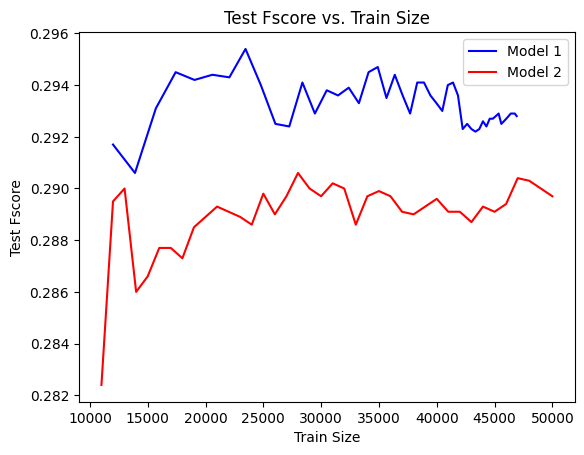

In [ ]:
# Plotting the chart
#plt.plot(train_sizes1, test_accuracies1, label="Model 1")
plt.plot(train_sizes2, test_fscore2,color='blue', label="Model 1")
plt.plot(train_sizes3, test_fscore3,color='red', label="Model 2")

plt.xlabel("Train Size")
plt.ylabel("Test Fscore")
plt.title("Test Fscore vs. Train Size")
plt.legend()  # Add legend to differentiate the lines
plt.show()

In [ ]:
#Add with condition from unlabeled data each time

#print(X_train.shape,X_test.shape)

train_sizes4 = []  # List to store train sizes
test_accuracies4 = []  # List to store test accuracies
test_fscore4=[]

# Split the training set into labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled= X_labeled1, X_unlabeled1, y_labeled1, y_unlabeled1

max_depth = 16
min_samples_split = 80
min_samples_leaf = 60

# Create a decision tree classifier
initial_model = DecisionTreeClassifier(max_depth = 8)

# Train an initial decision tree with labeled data
#initial_model = DecisionTreeClassifier()
initial_model.fit(X_labeled, y_labeled)

# Make predictions on the test data
y_pred_train = initial_model.predict(X_train)
y_pred = initial_model.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_pred_train, y_train_augmented)
print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)

# Compute classification metrics
report = classification_report(y_test, y_pred,digits=4)
# Extract the F-score, precision, and recall values
metrics = report.split('\n')[-2].split()[2:]

# Print the F-score, precision, and recall values
print("F-score:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])

# Save train size and test accuracy
train_sizes4.append(X_labeled.shape[0])
test_accuracies4.append(accuracy_test)
test_fscore4.append(float(metrics[0]))

# Specify the number of iterations
num_iterations =10

for iteration in range(num_iterations):
    print("Iteration "+ str(iteration+1))

    if(len(X_unlabeled)>0):
      # Predict labels and probabilities for the unlabeled data
      y_pred_unlabeled = initial_model.predict(X_unlabeled)
      y_pred_probs = initial_model.predict_proba(X_unlabeled)
    else:
      break

    # Find the indices of samples with high-confidence predictions
    confidence_threshold = 0.80
    high_confidence_indices = np.where(initial_model.predict_proba(X_unlabeled).max(axis=1) >= confidence_threshold)
      #np.logical_or(
      #    initial_model.predict_proba(X_unlabeled).max(axis=1) >= confidence_threshold
          #initial_model.predict_proba(X_unlabeled).max(axis=1) <= 0.20
      #))[0]

    # Add the selected samples to the labeled data
    X_labeled = np.concatenate((X_labeled, X_unlabeled[high_confidence_indices]), axis=0)
    y_labeled = np.concatenate((y_labeled, y_pred_unlabeled[high_confidence_indices]), axis=0)

    # Count the number of samples in each class
    #class_counts = np.bincount(np.ravel(y_labeled).astype(int))
    #print(class_counts)

    # Remove high-confidence samples from the unlabeled data
    X_unlabeled = np.delete(X_unlabeled, high_confidence_indices, axis=0)

    print(X_labeled.shape, X_unlabeled.shape)
    # Retrain the decision tree with the updated labeled data
    initial_model = DecisionTreeClassifier(max_depth = 8)
    initial_model.fit(X_labeled, y_labeled)

    # Make predictions on the test data
    y_pred_train = initial_model.predict(X_train)
    y_pred = initial_model.predict(X_test)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_pred_train, y_train_augmented)
    print("Test Accuracy:", accuracy_test)
    print("Train Accuracy:", accuracy_train)

    # Compute classification metrics
    report = classification_report(y_test, y_pred,digits=4)
    # Extract the F-score, precision, and recall values
    metrics = report.split('\n')[-2].split()[2:]

    # Print the F-score, precision, and recall values
    print("F-score:", metrics[0])
    print("Precision:", metrics[1])
    print("Recall:", metrics[2])

    # Save train size and test accuracy
    train_sizes4.append(X_labeled.shape[0])
    test_accuracies4.append(accuracy_test)
    test_fscore4.append(float(metrics[0]))

Test Accuracy: 0.2767
Train Accuracy: 0.29148
F-score: 0.2903
Precision: 0.2767
Recall: 0.2776
Iteration 1
(14215, 221) (35785, 221)
Test Accuracy: 0.2577
Train Accuracy: 0.26942
F-score: 0.2605
Precision: 0.2577
Recall: 0.2431
Iteration 2
(15570, 221) (34430, 221)
Test Accuracy: 0.2563
Train Accuracy: 0.26874
F-score: 0.2615
Precision: 0.2563
Recall: 0.2417
Iteration 3
(16108, 221) (33892, 221)
Test Accuracy: 0.2547
Train Accuracy: 0.2679
F-score: 0.2611
Precision: 0.2547
Recall: 0.2400
Iteration 4
(16203, 221) (33797, 221)
Test Accuracy: 0.2465
Train Accuracy: 0.25974
F-score: 0.2597
Precision: 0.2465
Recall: 0.2331
Iteration 5
(16681, 221) (33319, 221)
Test Accuracy: 0.2448
Train Accuracy: 0.258
F-score: 0.2607
Precision: 0.2448
Recall: 0.2310
Iteration 6
(16917, 221) (33083, 221)
Test Accuracy: 0.2455
Train Accuracy: 0.25882
F-score: 0.2612
Precision: 0.2455
Recall: 0.2308
Iteration 7
(17107, 221) (32893, 221)
Test Accuracy: 0.2504
Train Accuracy: 0.26276
F-score: 0.2537
Precision:

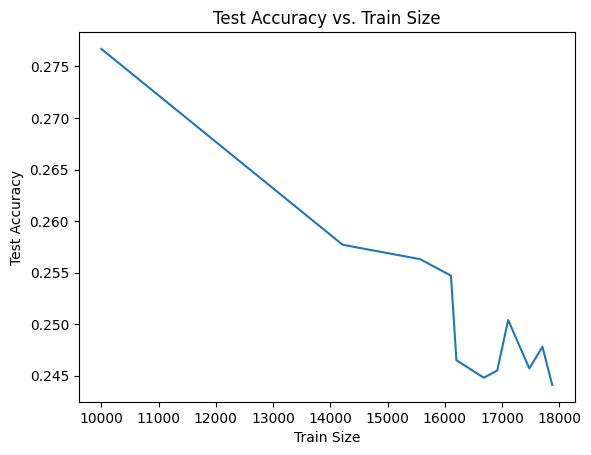

In [ ]:
# Plotting the chart
plt.plot(train_sizes4, test_accuracies4)
plt.xlabel("Train Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Train Size")
plt.show()

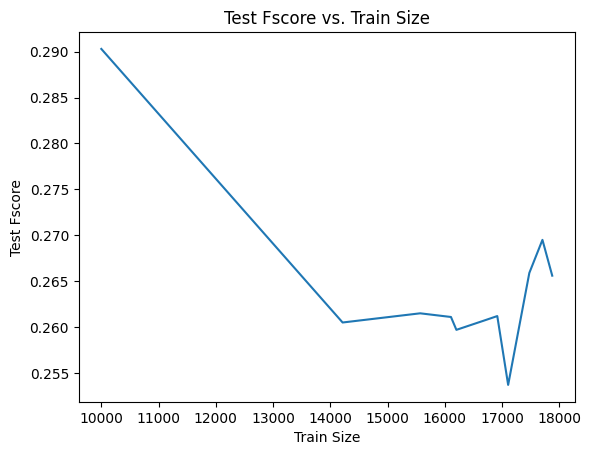

In [ ]:
# Plotting the chart
plt.plot(train_sizes4, test_fscore4)
plt.xlabel("Train Size")
plt.ylabel("Test Fscore")
plt.title("Test Fscore vs. Train Size")
plt.show()

# Auto Encoder


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.autograd import Variable

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU for training.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU for training.")

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(256, 3, kernel_size=3, padding=1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 15

# Load CIFAR-10 dataset
train_dataset = CIFAR10(root='./data', train=True, transform=ToTensor(), download=True)
test_dataset = CIFAR10(root='./data', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the Autoencoder model
autoencoder = Autoencoder().to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    train_loss = 0.0

    for images, _ in train_loader:
        images = images.to(device)
        reconstructions = autoencoder(images)


        # Compute loss
        loss = criterion(reconstructions, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    # Calculate average loss
    train_loss /= len(train_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

import os

save_dir = 'save'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'cnn_autoencoder.pth')

# Save the trained model
torch.save(autoencoder.state_dict(), save_path)

# Load the trained model
autoencoder = Autoencoder().to(device)
autoencoder.load_state_dict(torch.load('save/cnn_autoencoder.pth'))


# Get encoder features
encoder = autoencoder.encoder
encoder_features_train = []
labels_train = []  # Store the labels

for images, labels in train_loader:
    images = images.to(device)  # Move images to the GPU device
    features = encoder(images)
    encoder_features_train.append(features.detach())
    labels_train.extend(labels)  # Save the labels

encoder_features_train = torch.cat(encoder_features_train, dim=0)

# Reshape encoder features
encoder_features_train = encoder_features_train.view(encoder_features_train.size(0), -1)

# Convert labels_train to a NumPy array
labels_train = np.array(labels_train)




CUDA is available. Using GPU for training.


100%|██████████| 170498071/170498071 [00:12<00:00, 13148036.18it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/1], Loss: 0.0177


In [ ]:
encoder_features_train = encoder_features_train.to('cpu').numpy()


In [ ]:
# Get encoder features
encoder = autoencoder.encoder
encoder_features_test = []
labels_test = []  # Store the labels

for images, labels in test_loader:
    images = images.to(device)  # Move images to the GPU device
    features = encoder(images)
    encoder_features_test.append(features.detach())
    labels_test.extend(labels)  # Save the labels

encoder_features_test = torch.cat(encoder_features_test, dim=0)

# Reshape encoder features
encoder_features_test_flat = encoder_features_test.view(encoder_features_test.size(0), -1).to('cpu').numpy()

# Convert labels_train to a NumPy array
labels_test= np.array(labels_test)



In [ ]:
print(encoder_features_test_flat.shape)

(10000, 1024)


In [ ]:
X_train=encoder_features_train
y_train_augmented= labels_train
X_test=encoder_features_test_flat
y_test= labels_test

# Decision tree classification system applied on extracted features using Auto Encoder


In [ ]:
import numpy as np

# Move the encoder features and labels to CPU and convert to NumPy arrays
encoder_features_train_np = np.concatenate([tensor.cpu().numpy() for tensor in encoder_features_train], axis=0)


# Create the decision tree classifier
classifier = DecisionTreeClassifier(max_depth = 6)

predicted_labels = []
# Train the classifier
classifier.fit(encoder_features_train, labels_train)
predicted_labels = classifier.predict(encoder_features_test_flat)

# Calculate accuracy
accuracy_test = accuracy_score(labels_test, predicted_labels)

print("Accuracy:", accuracy_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
